# Pareto Hybrids w Asymmetric Tails #

The **Phat** distribution is a two-tailed, fully-continuous, well-defined asymmetric power law probability distribution.

The package makes available several methods to fit a given time-series dataset to the parameters of the Phat distribution and produce a forecast with the results.

In [105]:
import pathlib
pathlib.HERE

AttributeError: module 'pathlib' has no attribute 'HERE'

In [ ]:
Dependencies:
    
**Numba**

**Tensorflow**

**Scipy**

**Scikit-learn**

## The Issue with Fat Tails ##

Many phenomena are understood to exhibit fat tails: insurance losses, wealth distribution, [rainfall](https://hess.copernicus.org/articles/17/851/2013/hess-17-851-2013.pdf), etc. These are one-tailed phenomenom (usually bounded by zero) for which many potential distributions are applicable: Weibull, Levy, Frechet, Paretos I-IV, the generalized Pareto, the Extreme Value distribution etc.

For two-tailed phenomenon, such as financial asset returns, there are only two and decidedly imperfect candidates:

+ Levy-Stable Distribion 
    + the Levy-Stable is bounded in the range $\alpha \in (0, 2]$ with $\alpha = 2$ being the Gaussian distribution. Thus, the Levy-Stable *only* exhibits fat tails with tail index $\alpha < 2$
    + Unfortunately, equity returns in particular are known to have both a [second moment](https://fan.princeton.edu/fan/FinEcon/chap1.pdf) AND [fat tails](https://papers.tinbergen.nl/98017.pdf), meaning $\alpha > 2$, which the Levy-Stable does not support.
+ Student's T
    + the Student's T is the most popular distribution for modelling asset returns as it does exhibit fat tails and it is power law-*like*.
    + unfortunately, the Student's T only *tends* toward a power law in the extreme tails and so can still heavily underestimate unlikely events.
    + also, the Student's T is symmetric and cannot accomodate different tail indices in either tail. Nor can the skewed Student's T, which is asymmetric, but accepts only a single tail index.

*we should note that recently an asymmetric Student's T has* [been proposed](https://www.sciencedirect.com/science/article/abs/pii/S0304407610000266) *to address this.*

## the Phat Distribution ##

The Phat Distribution is a mixture model of two Pareto hybrid distributions, as described in [2009 by Julie Carreau and Yoshua Bengio](https://www.researchgate.net/publication/226293435_A_hybrid_Pareto_model_for_asymmetric_fat-tailed_data_The_univariate_case) (and dubbed by us the "CarBen" distribution). The CarBen, in turn, is a piece-wise combination of a single Gaussian distribution and a generalized Pareto distribution fused together at the Pareto location, $a$.

The result is a distribution with Gaussian-body and distinct Pareto power laws in either tail. The distribution requires only 4 parameters:

+ $\mu, \sigma$ in the Gaussian body
+ $\xi_{\text{left}}, \xi_{\text{right}}$, being the inverse tail index for either Paretian tail.

Below, we show a Phat distribution with a standard normal body and symmetric Paretian tails with $\xi = .2$ (corresponding to $\alpha = 5$), highlighting the distributions different sections.

In [58]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
import scipy.stats as scist
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'whitegrid')

from phat import Phat

shape, mean, sig = 1/5, 0, 1
x = np.linspace(-5+mean, 5+mean, 1000)
phat_dist = Phat(mean, sig, shape, shape)

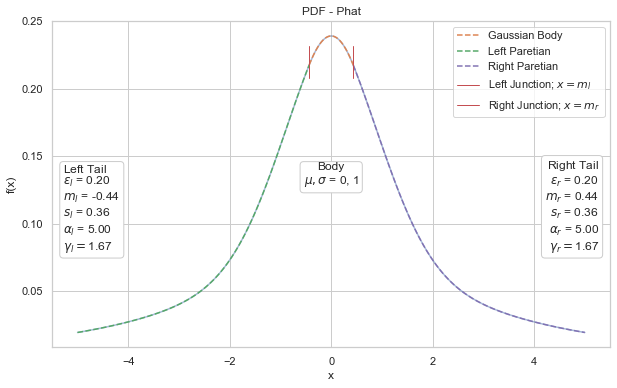

In [87]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(x, phat_dist.pdf(x), alpha=.5)
x_body = np.linspace(phat_dist.left.loc, phat_dist.right.loc, 100)
x_left = np.linspace(x[0], phat_dist.left.loc, 100)
x_right = np.linspace(phat_dist.right.loc, x[-1], 100)
ax1.plot(x_body, phat_dist.pdf(x_body), c='C1', ls='--', label='Gaussian Body')
ax1.plot(x_left, phat_dist.pdf(x_left), c='C2', ls='--', label='Left Paretian')
ax1.plot(x_right, phat_dist.pdf(x_right), c='C4', ls='--', label='Right Paretian')

ax1.axvline(
    phat_dist.left.loc, .825, .925, 
    c='r', lw=1, label=r'Left Junction; $x = m_l$')
ax1.axvline(phat_dist.right.loc, .825, .925, c='r', lw=1, label=r'Right Junction; $x = m_r$')

paramtxt = 'Body'
paramtxt += '\n'
paramtxt += r'$\mu, \sigma$ = ' + f'{phat_dist.mean:.0f}, {phat_dist.sig:.0f}'

ax1.text(
    .5, .5, paramtxt, ha='center',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)

paramtxt = r'Left Tail$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{phat_dist.shape_l:.2f}'
paramtxt += '\n'
paramtxt += r'$m_l$ = ' + f'{phat_dist.left.loc:.2f}'
paramtxt += '\n'
paramtxt += r'$s_l$ = ' + f'{1 / phat_dist.left.scale:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / phat_dist.left.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{phat_dist.right.gamma:.2f}'

ax1.text(
    .02,.3, paramtxt,
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
paramtxt = r'Right Tail$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_r$ = ' + f'{phat_dist.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$m_r$ = ' + f'{phat_dist.right.loc:.2f}'
paramtxt += '\n'
paramtxt += r'$s_r$ = ' + f'{1 / phat_dist.right.scale:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_r$ = ' + f'{1 / phat_dist.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_r = $' + f'{phat_dist.right.gamma:.2f}'

ax1.text(
    .98,.3, paramtxt, ha='right',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')

ax1.legend()
ax1.set_title('PDF - Phat')

plt.show()

The Paretian tails are parameterized independently and so allow for asymmetry. Below we show two Phat distributions, one with symmetric tail index of $\alpha=2$ and the other with asymmetric tail indices, $\alpha_{\text{left}}=2$ and $\alpha_{\text{right}}=20$.

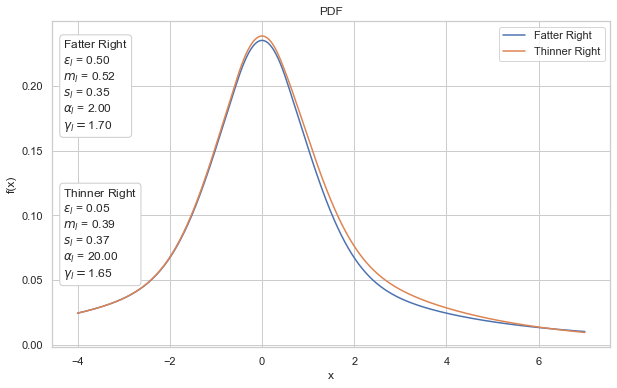

In [88]:
mean, sig = 0, 1
x = np.linspace(-4+mean, 7+mean, 1000)
shape_l1, shape_r = 1/2, 1/2
dist1 = Phat(mean, sig, shape_l1, shape_r)
shape_l2, shape_r = 1/2, 1/20
dist2 = Phat(mean, sig, shape_l2, shape_r,)

fig, ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(x, dist1.pdf(x), label='Fatter Right')
ax1.plot(x, dist2.pdf(x), label='Thinner Right')

paramtxt = r'Fatter Right$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{dist1.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$m_l$ = ' + f'{dist1.right.loc:.2f}'
paramtxt += '\n'
paramtxt += r'$s_l$ = ' + f'{1 / dist1.right.scale:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / dist1.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{dist1.right.gamma:.2f}'

ax1.text(
    .02,.95, paramtxt, va='top',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
paramtxt = r'Thinner Right$_{}$'
paramtxt += '\n'
paramtxt += r'$\epsilon_{l}$ = ' + f'{dist2.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$m_l$ = ' + f'{dist2.right.loc:.2f}'
paramtxt += '\n'
paramtxt += r'$s_l$ = ' + f'{1 / dist2.right.scale:.2f}'
paramtxt += '\n'
paramtxt += r'$\alpha_l$ = ' + f'{1 / dist2.right.shape:.2f}'
paramtxt += '\n'
paramtxt += r'$\gamma_l = $' + f'{dist2.right.gamma:.2f}'

ax1.text(
    .02,.2, paramtxt, va='bottom',
    transform=ax1.transAxes,
    bbox=dict(boxstyle='round', ec='.8', fc='w')
)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')

ax1.legend()

ax1.set_title('PDF')

plt.show()

The left tails are identical and, as would be expected, the distribution with the greater tail index has a slightly lower probability in the body and a slightly higher probability out in the tails ... that slightly higher probability leading to dramatically different effects, as we know.

## Demo ##

Users are, of course, welcome to use the Phat distribution in any way they see fit. Below we  show simple process for fitting and projecting a financial time series using `phat`; this example will utilize end-of-day daily prices of Coca-Cola, for which there is data back to 1962.

the Fit:

+ download the daily prices of Coca-Cola (ticker: KO). Find the daily returns in percentage terms (i.e. x 100).
+ use the `arch` package to fit a GARCH(1,1) model to the daily returns
+ use the Hill double bootstrap method to estimate the tail index of both tails of the standardized residuals of the AR-GARCH fit.
+ use `phat` custom data class, `DataSplit`, to split the data into training, testing, and validation subsets. *Be careful to scale by 1/10.*
+ use `PhatNet` and `phat`'s custom loss function `PhatLoss` to fit the remaining parameters.
+ use `Garchcaster` to produce 1,000 simulations of a one-year forecast via the same AR-GARCH model.

In [5]:
import yfinance as yf
import arch
import phat

In [6]:
ko = yf.download('KO')
ko_ret = ko.Close.pct_change().dropna()*100
ko_ret = ko_ret[-252*10:]

[*********************100%***********************]  1 of 1 completed


In [7]:
res = arch.arch_model(ko_ret, mean='Constant', vol='Garch', p=1, q=1).fit(disp='off')
xi_left, xi_right = phat.two_tailed_hill_double_bootstrap(res.std_resid)

100%|██████████| 10/10 [00:02<00:00,  3.70it/s]


In [93]:
data = phat.DataSplit(res.std_resid[2:]/10)
pnet = phat.PhatNet(neurons=1)
pnet.compile(loss=phat.PhatLoss(xi_left,xi_right), optimizer='adam')
history = pnet.fit(data.train, validation_data=data.test, epochs=100, verbose=0)

Epoch 00069: early stopping


The training process above results in the following estimated parameters for the standardized GARCH residuals.

In [95]:
pnet.predicted_params()

,
mean,0.000705
sig,0.035224
shape_l,0.333374
shape_r,0.288270


Below we compare the fit of the Phat distribution to that of the Guassian and the Student's T. Note the Student's T fits to $v=4.65$, which is equivalent to $\xi = 0.22$, which is a thinner tail than found through the Hill Double bootstrap, particularly for the left tail.

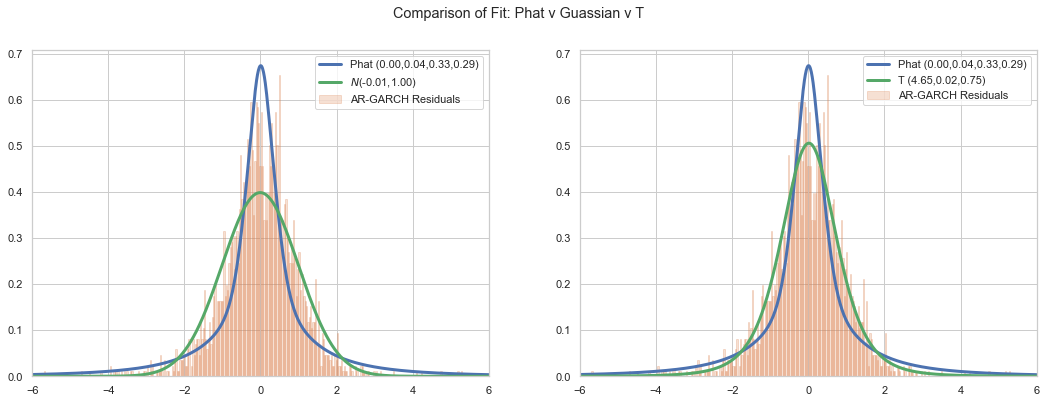

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
mu, sig, l, r = pnet.predicted_params().values.flatten()
phatdist = Phat(mu*10, sig*10, l, r)

x = np.linspace(-6,6,1000)
counts, bins, _ = ax1.hist(
    data.raw.y*10, bins=500, density=True, fc='C1', ec='C1', alpha=.25,
    label='AR-GARCH Residuals'
)
ax1.plot(x, phatdist.pdf(x), lw=3, c='C0', label=f'Phat ({mu:.2f},{sig:.2f},{l:.2f},{r:.2f})')

norm_params = scist.norm.fit(data.raw.y*10)
norm_label = ','.join([f'{p:.2f}' for p in norm_params])
ax1.plot(x, scist.norm(*norm_params).pdf(x), c='C2', lw=3, label=r'$N$' f'({norm_label})')
ax1.set_xlim(-6, 6)

counts, bins, _ = ax2.hist(
    data.raw.y*10, bins=500, density=True, fc='C1', ec='C1', alpha=.25,
    label='AR-GARCH Residuals'    
)
ax2.plot(x, phatdist.pdf(x), lw=3, c='C0', label=f'Phat ({mu:.2f},{sig:.2f},{l:.2f},{r:.2f})')

t_params = scist.t.fit(data.raw.y*10)
t_label = ','.join([f'{p:.2f}' for name, p in zip([r'$v$', 'loc', 'scale'], t_params)])
ax2.plot(x, scist.t(*t_params).pdf(x), c='C2', lw=3, label=f'T ({t_label})')
ax2.set_xlim(-6, 6)

ax1.legend()
ax2.legend()

plt.suptitle('Comparison of Fit: Phat v Guassian v T')

plt.show()

Note that the Phat distribution is a better fit to the peak of the distribution while both the normal distribution and Student's T are better fits in the shoulders. The devil, of course, is in the de*tails*.

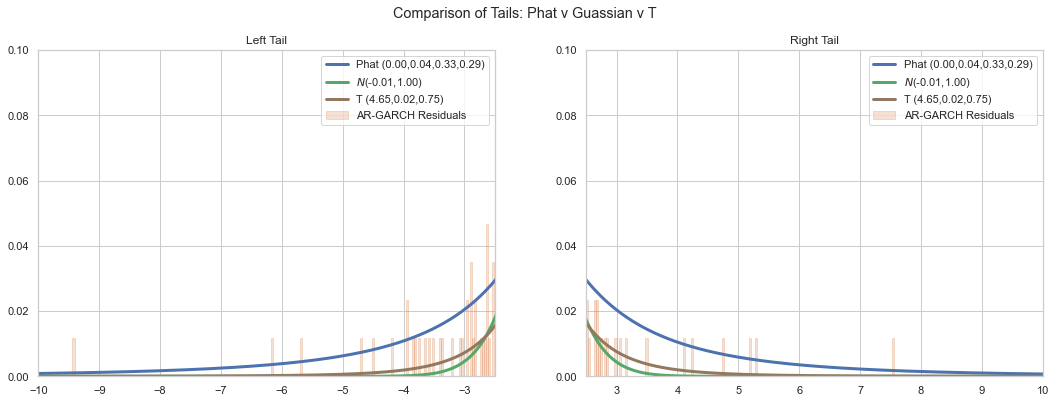

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
mu, sig, l, r = pnet.predicted_params().values.flatten()
phatdist = Phat(mu*10, sig*10, l, r)

x = np.linspace(-10,-2,1000)
counts, bins, _ = ax1.hist(
    data.raw.y*10, bins=500, density=True, fc='C1', ec='C1', alpha=.25,
    label='AR-GARCH Residuals'
)
ax1.plot(x, phatdist.pdf(x), lw=3, c='C0', label=f'Phat ({mu:.2f},{sig:.2f},{l:.2f},{r:.2f})')

norm_params = scist.norm.fit(data.raw.y*10)
norm_label = ','.join([f'{p:.2f}' for p in norm_params])
t_params = scist.t.fit(data.raw.y*10)
t_label = ','.join([f'{p:.2f}' for name, p in zip([r'$v$', 'loc', 'scale'], t_params)])

ax1.plot(x, scist.norm(*norm_params).pdf(x), c='C2', lw=3, label=r'$N$' f'({norm_label})')
ax1.plot(x, scist.t(*t_params).pdf(x), c='C5', lw=3, label=f'T ({t_label})')
ax1.set_xlim(-10,-2.5)
ax1.set_ylim(0,.1)

x = np.linspace(2,10,1000)
counts, bins, _ = ax2.hist(
    data.raw.y*10, bins=500, density=True, fc='C1', ec='C1', alpha=.25,
    label='AR-GARCH Residuals'    
)
ax2.plot(x, phatdist.pdf(x), lw=3, c='C0', label=f'Phat ({mu:.2f},{sig:.2f},{l:.2f},{r:.2f})')
ax2.plot(x, scist.norm(*norm_params).pdf(x), c='C2', lw=3, label=r'$N$' f'({norm_label})')
ax2.plot(x, scist.t(*t_params).pdf(x), c='C5', lw=3, label=f'T ({t_label})')
ax2.set_xlim(2.5,10)
ax2.set_ylim(0,.1)

ax1.legend()
ax2.legend()
ax1.set_title('Left Tail')
ax2.set_title('Right Tail')

plt.suptitle('Comparison of Tails: Phat v Guassian v T')

plt.show()

Out in the left and right tails we see the Phat distribution does a far-better job capturing hte extreme events that have occured in the past 10 years. See the documentation for why this seemingly minor improvement has such a big impact in the tails. 

We can then feed this distribution, along with the results from the AR-GARCH fit, into the `Garchcaster`.

In [98]:
n = 10000
days = 252*10

mu, sig, l, r = pnet.predicted_params().values
phatdist = Phat(mu*10, sig*10, l, r)
fore = phat.Garchcaster(
    res.std_resid[2:],
    res.conditional_volatility[2:],
    res.resid[2:],
    None,
    res.params,
    iters=n,
    periods=days,
    order=(0,0,1,1),
    dist=phatdist
).forecast()

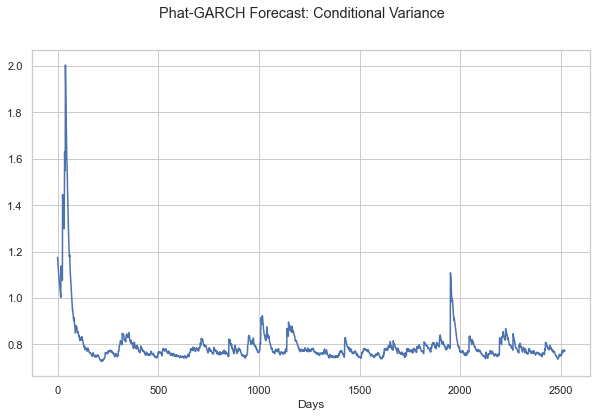

In [99]:
fore.plot('var')
plt.show()

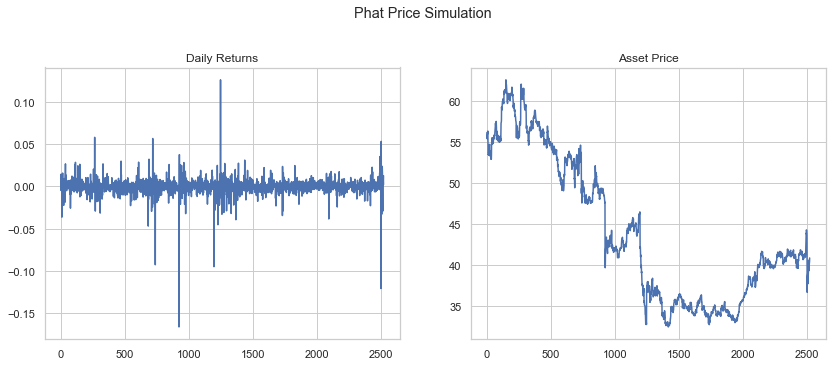

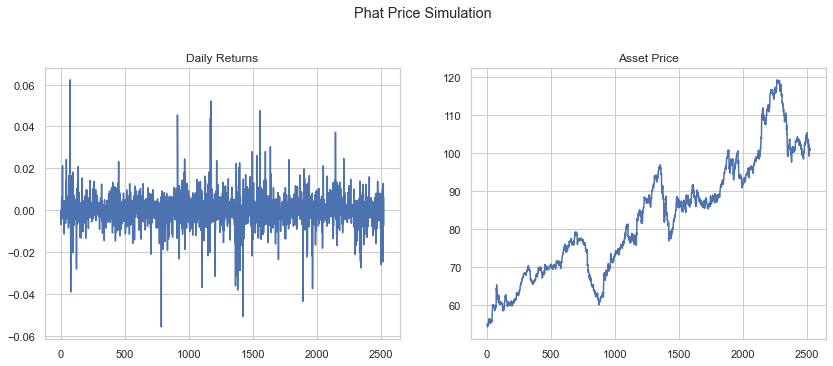

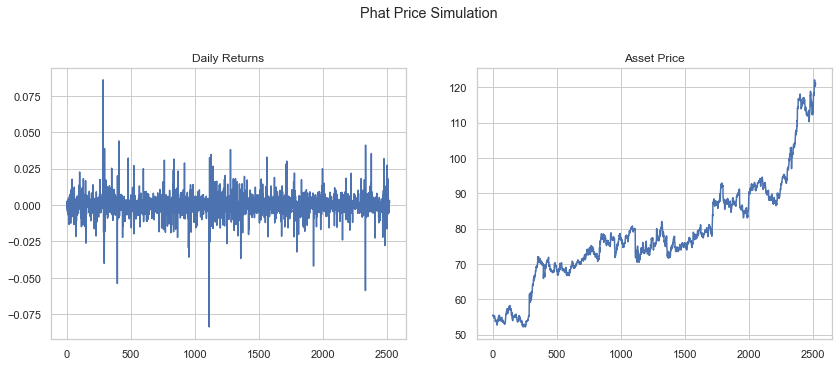

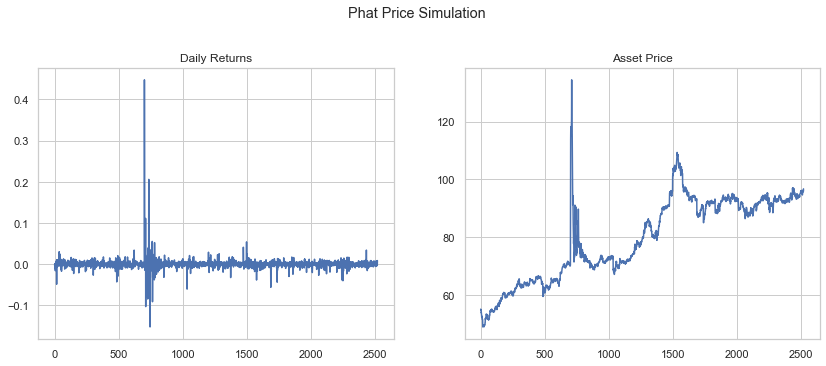

In [100]:
fore.plot('price', p=ko.Close[-1], n=4)
plt.show()

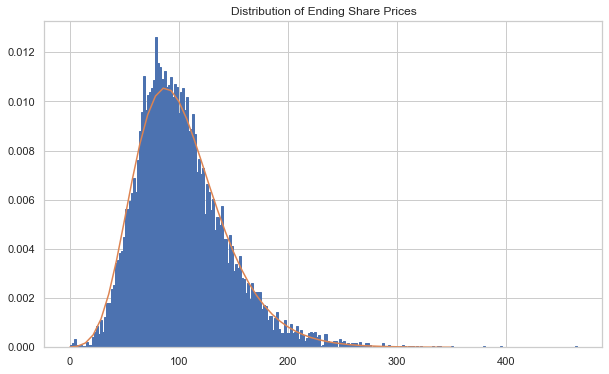

In [101]:
ax, P = fore.plot('end_price', p=ko.Close[-1], ec='C0')
lnorm_fit = scist.lognorm.fit(P[:, -1])
ax.plot(np.linspace(0, 350), scist.lognorm(*lnorm_fit).pdf(np.linspace(0, 350)))
plt.show()